<a href="https://colab.research.google.com/github/CaptainChuenthavorn/Data-Analytics2022s/blob/main/DA_partB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
A_train_path = "https://raw.githubusercontent.com/CaptainChuenthavorn/Data-Analytics2022s/main/Assignment1/A-train.csv"
A_test_path = "https://raw.githubusercontent.com/CaptainChuenthavorn/Data-Analytics2022s/main/Assignment1/A-test.csv"
B_train_path = "https://raw.githubusercontent.com/CaptainChuenthavorn/Data-Analytics2022s/main/Assignment1/B-train.csv"
B_test_path = "https://raw.githubusercontent.com/CaptainChuenthavorn/Data-Analytics2022s/main/Assignment1/B-test.csv"

##VERSION 1
1. Impute with mean 
2. drop outlier
3. feature x2 x8

In [ ]:
df = pd.read_csv(B_train_path)
df_ori = pd.read_csv(B_train_path)

In [ ]:
print('all null:',df.isnull().sum().sum())
print('null at y:',df['y'].isnull().sum())
df.dropna(subset=['y'], inplace=True)

all null: 80
null at y: 2


In [ ]:
df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,y
count,178.000000,179.000000,179.000000,178.000000,179.000000,178.000000,178.000000,1.780000e+02,188.000000
mean,12.623315,-12.773966,-2.461732,-0.176461,-0.329832,-0.452360,15.669719,1.564650e+05,2.933298
std,360.486969,335.385583,34.981099,33.680714,33.286940,39.722576,374.342103,9.732047e+05,9.200321
min,-2637.520000,-2049.360000,-250.110000,-233.640000,-216.320000,-282.960000,-1987.360000,4.800000e-01,-19.830000
25%,-67.617500,-93.865000,-9.385000,-6.410000,-8.200000,-7.772500,-72.467500,1.252713e+03,-2.935000
50%,-3.650000,-8.070000,-2.600000,0.520000,-0.050000,0.255000,14.715000,5.119200e+03,2.980000
75%,63.797500,50.125000,6.755000,7.430000,8.185000,7.225000,73.400000,1.461932e+04,8.572500
max,2661.480000,2217.600000,192.870000,194.240000,205.920000,224.400000,2772.630000,7.503436e+06,30.600000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 0 to 189
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      178 non-null    float64
 1   x2      179 non-null    float64
 2   x3      179 non-null    float64
 3   x4      178 non-null    float64
 4   x5      179 non-null    float64
 5   x6      178 non-null    float64
 6   x7      178 non-null    float64
 7   x8      178 non-null    float64
 8   y       188 non-null    float64
dtypes: float64(9)
memory usage: 14.7 KB


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


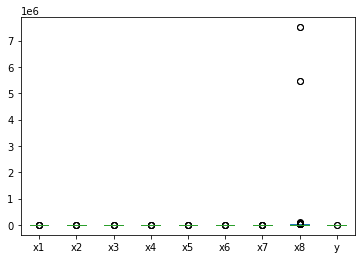

In [ ]:
df.plot.box()

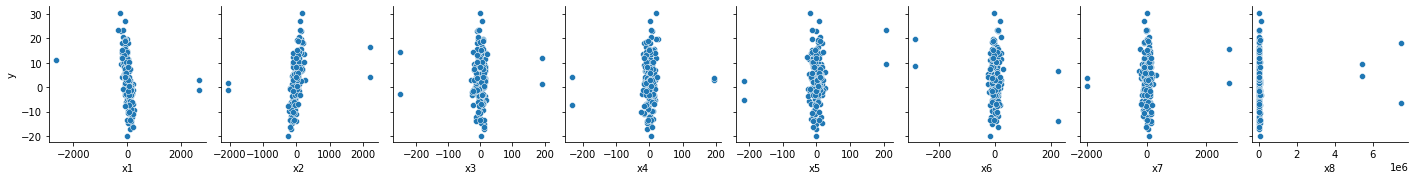

In [ ]:
sns.pairplot(df,x_vars=df.columns[0:8],y_vars=df.columns[8])

In [ ]:
str_list=['x1','x2','x3','x4','x5','x6','x7','x8']
#sns.pairplot(df[str_list],diag_kind="kde",corner=True)

In [ ]:
df.isnull().sum().sum()

77

Impute with mean

In [ ]:
df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,y
count,178.000000,179.000000,179.000000,178.000000,179.000000,178.000000,178.000000,1.780000e+02,188.000000
mean,12.623315,-12.773966,-2.461732,-0.176461,-0.329832,-0.452360,15.669719,1.564650e+05,2.933298
std,360.486969,335.385583,34.981099,33.680714,33.286940,39.722576,374.342103,9.732047e+05,9.200321
min,-2637.520000,-2049.360000,-250.110000,-233.640000,-216.320000,-282.960000,-1987.360000,4.800000e-01,-19.830000
25%,-67.617500,-93.865000,-9.385000,-6.410000,-8.200000,-7.772500,-72.467500,1.252713e+03,-2.935000
50%,-3.650000,-8.070000,-2.600000,0.520000,-0.050000,0.255000,14.715000,5.119200e+03,2.980000
75%,63.797500,50.125000,6.755000,7.430000,8.185000,7.225000,73.400000,1.461932e+04,8.572500
max,2661.480000,2217.600000,192.870000,194.240000,205.920000,224.400000,2772.630000,7.503436e+06,30.600000


In [ ]:
#impute with mean
mean_value_list = []
for j in range(8):
  col_name = 'x'+str(j+1)
  mean_value=df[col_name].mean()
  mean_value_list.append(mean_value_list)
  #print(col_name,'mean value',mean_value)
  
  df[col_name].fillna(value=mean_value,inplace=True)
  #print('fill',col_name,'sucess!')

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.dropna(subset = ["y"], inplace=True)

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
#sns.pairplot(df,x_vars=df.columns[0:8],y_vars=df.columns[8])

In [ ]:
#str_list=['x1','x2','x3','x4','x5','x6','x7','x8']
#sns.pairplot(df[str_list],diag_kind="kde",corner=True)

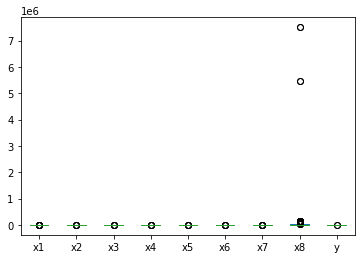

In [ ]:
df.plot.box()

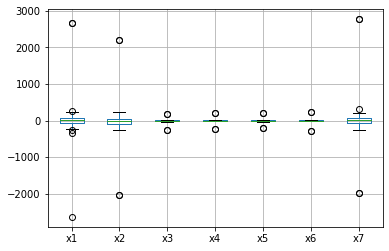

In [ ]:
stud_bplt = df.boxplot(column = [
    'x1','x2','x3','x4','x5','x6','x7',
])
stud_bplt.plot()
plt.show()

In [ ]:
print(len(df.index))

188


In [ ]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out
for j in range(8):
  col_name = 'x'+str(j+1)
  df = remove_outlier(df,col_name)

In [ ]:
print('After drop outlier :',len(df.index))

After drop outlier : 138


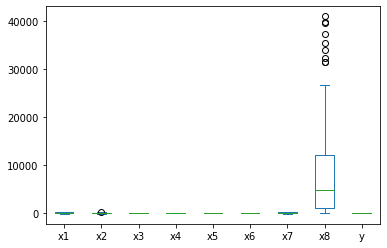

In [ ]:
df.plot.box()

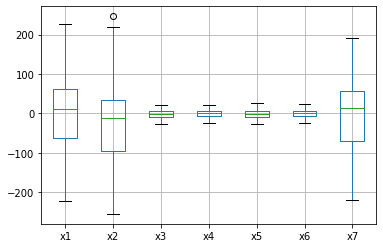

In [ ]:
stud_bplt = df.boxplot(column = [
    'x1','x2','x3','x4','x5','x6','x7',
])
stud_bplt.plot()
plt.show()

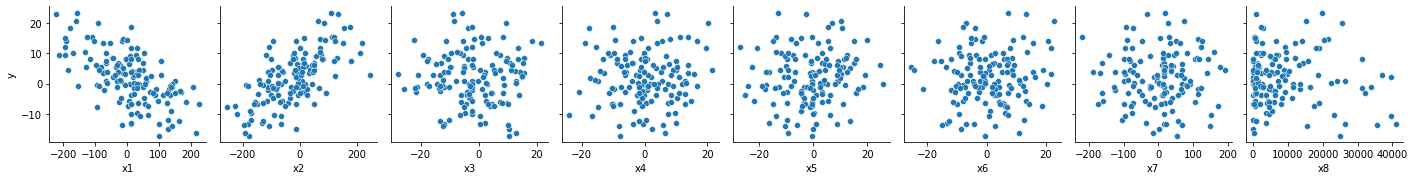

In [ ]:
sns.pairplot(df,x_vars=df.columns[0:8],y_vars=df.columns[8])

In [ ]:
#sns.heatmap(df[str_list].corr(),annot=True)

In [ ]:
#sns.pairplot(df)

In [ ]:
df.corr().sort_values("y")[["y"]]

,y
x1,-0.622524
x8,-0.095145
x3,-0.013922
x7,0.003252
x4,0.055390
x6,0.075987
x5,0.088364
x2,0.659877
y,1.000000


feature x1 x2

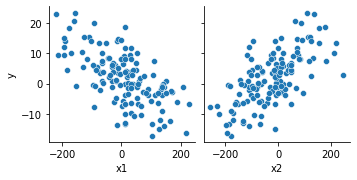

In [ ]:
sns.pairplot(df, x_vars=["x1","x2"], y_vars=["y"])

reset index

In [ ]:
#df

In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
#df

In [ ]:
x=df[['x1','x2']]
y=df['y']

In [ ]:
#x

In [ ]:
#y

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=101)

In [ ]:
scaler=preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#X_train

In [ ]:
print("len(X_train) : ", len(X_train))
print("len(X_test) : ", len(X_test))
print("len(y_train) : ", len(y_train))
print("len(y_test) : ", len(y_test))
print(len(df.index))
print(len(df_ori.index))

len(X_train) :  82
len(X_test) :  56
len(y_train) :  82
len(y_test) :  56
138
190


In [ ]:
lm = LinearRegression()
lm.fit(X_train,y_train)
lm.coef_

array([-4.71761895,  4.69810063])

In [ ]:
lm.intercept_

1.34280487804878

In [ ]:
print("LM MODEL")
print("")
print(y.name, "=")
for i in range(0,len(x.columns)):
  print("", lm.coef_[i],"*",x.columns[i],"   +")
print("", lm.intercept_)

LM MODEL

y =
 -4.71761894672727 * x1    +
 4.69810062506658 * x2    +
 1.34280487804878


predict

In [ ]:
y_pred = lm.predict(X_test)
y_pred

array([  5.05710576,   5.29783551,   2.56297411, -16.76950051,
         5.2077526 ,  -8.44861434,  14.10714776,   7.18350601,
        -6.67553403,  -1.19439257,   7.21780254,  -2.53060874,
        -0.63381178,   7.01839131,   3.4424866 ,   0.27220228,
        15.94498115,   0.53800285,  -2.13963691,   6.93084973,
       -11.09843822,  -6.13991209,  11.39614827,   3.80827303,
        -9.15770992,  -5.82684377,   5.24708857,   3.75004414,
         0.64534326,   3.49948471,  -9.05801658,   6.73449627,
         3.20713281,  -3.14845847,  -6.00925026,  -9.18612261,
        11.74803965,  -0.74428595,  -4.3065773 ,   0.30078846,
         2.35021665,   5.81968878,   3.83827832,   1.17173169,
        11.71340853,  -0.6083588 ,  12.10313342,   3.90011689,
        11.86330624,  10.48048871,   7.64157449,  10.09417236,
         4.26722606,   1.12813951,  -5.58228468,  16.62318328])

evaluate

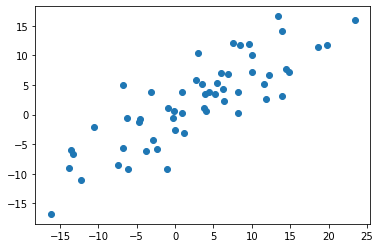

In [ ]:
plt.scatter(y_test,y_pred)

##Result Version1

In [ ]:
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
print("RMSE = ", rmse)
print('data len :',len(df.index))

RMSE =  4.967936017208064
data len : 138


In [ ]:
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("MAPE = ", mape, "%")

MAPE =  inf %


K-FOLD

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=4, shuffle=True)

In [ ]:
kf.get_n_splits(x)

4

In [ ]:
# for train_index, test_index in kf.split(x):
#   print("train_index =", train_index)
#   print("test_index =", test_index)
#   print(" -------------- ")

In [ ]:
#train_index

In [ ]:
#y

In [ ]:
#y.loc[train_index]

In [ ]:
#y.loc[test_index]

In [ ]:
rmse_ = []

for train_index, test_index in kf.split(x):
  X_train = x.loc[train_index]
  X_test = x.loc[test_index]
  y_train = y.loc[train_index]
  y_test = y.loc[test_index]

  lm = LinearRegression()
  lm.fit(X_train, y_train)
  y_pred = lm.predict(X_test)
  rmse_.append(np.sqrt(((y_test - y_pred)**2).mean()))

In [ ]:
rmse_
print("RMSE for 4-fold = ", np.mean(rmse_) )

RMSE for 4-fold =  4.465356932948935


In [ ]:
print("RMSE for 4-fold = ", np.mean(rmse_) )

RMSE for 4-fold =  4.465356932948935


##Version 2
1. Impute with mean 
2. cap outlier
3. feature x1 x2

In [ ]:
df = pd.read_csv(B_train_path)
df_ori = pd.read_csv(B_train_path)

In [ ]:
print('all null:',df.isnull().sum().sum())
print('null at y:',df['y'].isnull().sum())
df.dropna(subset=['y'], inplace=True)
print('data len:',len(df.index))

all null: 80
null at y: 2
data len: 188


In [ ]:
#impute with mean
mean_value_list = []
for j in range(8):
  col_name = 'x'+str(j+1)
  mean_value=df[col_name].mean()
  mean_value_list.append(mean_value_list)
  #print(col_name,'mean value',mean_value)
  df[col_name].fillna(value=mean_value,inplace=True)
  #print('fill',col_name,'sucess!')
print('all null:',df.isnull().sum().sum())
print('data len:',len(df.index))

all null: 0
data len: 188


In [ ]:
#cap outlier 
def cap_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    lst=[fence_low,fence_high]

    #df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return fence_low,fence_high
for i in range(8):
  col_name = 'x'+str(i+1)
  
  fence_low,fence_high = cap_outlier(df,col_name)
  print(fence_low,fence_high)
  df[col_name].values[df[col_name].values < fence_low] = fence_low
  df[col_name].values[df[col_name].values > fence_high] = fence_high

print('data len:',len(df.index))

-254.41750000000002 246.70250000000001
-298.21875 255.99125
-31.193749999999998 27.936249999999998
-25.53375 26.216250000000002
-28.862500000000004 27.837500000000002
-28.54625 28.32375
-281.45624999999995 280.09375
-24362.8975 44644.2825
data len: 188


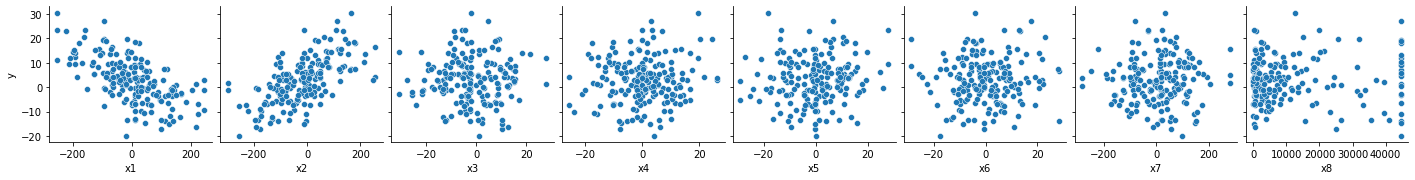

In [ ]:
sns.pairplot(df,x_vars=df.columns[0:8],y_vars=df.columns[8])

In [ ]:
df.corr().sort_values("y")[["y"]]

,y
x1,-0.614734
x3,-0.002565
x8,-0.002357
x7,0.029469
x6,0.046439
x4,0.078068
x5,0.088765
x2,0.627545
y,1.000000


In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
x=df[['x1','x2']]
y=df['y']

train test

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=101)

In [ ]:
scaler=preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print("len(X_train) : ", len(X_train))
print("len(X_test) : ", len(X_test))
print("len(y_train) : ", len(y_train))
print("len(y_test) : ", len(y_test))
print(len(df.index))
print(len(df_ori.index))

len(X_train) :  112
len(X_test) :  76
len(y_train) :  112
len(y_test) :  76
188
190


In [ ]:
lm = LinearRegression()
lm.fit(X_train,y_train)
print("LM MODEL")
print("")
print(y.name, "=")
for i in range(0,len(x.columns)):
  print("", lm.coef_[i],"*",x.columns[i],"   +")
print("", lm.intercept_)

LM MODEL

y =
 -4.4815608865276015 * x1    +
 5.296436491458917 * x2    +
 3.2782142857142853


predict

In [ ]:
y_pred = lm.predict(X_test)
y_pred

array([ 16.25703722,   3.46684663,   4.64779072,   1.42241477,
         7.65481309,  -8.1300151 ,  13.0674688 ,  -6.36841463,
         8.17974648,   9.67179442,  12.05516609,  17.22364371,
        -2.46418422,  -2.37733996,   3.60453773,  -1.68043535,
        -4.68298908,   7.50742177,   6.38450675,  12.19806263,
         0.15252406,  -0.16668819,   8.9537372 ,  -9.57603143,
         6.03985654,   6.00138248,  -1.85296816,   5.85885426,
       -10.02455362,  -2.81844403,  10.28702542,  -3.4881299 ,
        -4.73307742,   6.8259807 ,   6.38763715,   7.6967337 ,
        -6.85234647,  10.20819908,   6.81460112,  -0.39111588,
        -8.0008799 , -10.67433015,   0.04672804,   6.9348439 ,
         6.79758293,  -1.28616549,   8.63432019,   3.76947262,
        -2.61099845,  -3.11943603, -15.57921515,  11.93375127,
         0.18201126,  -3.64243438,  -8.50742735,   3.29212513,
        10.19424342,   5.81973536,  -2.50239764,  -8.31466324,
         9.56801843,  -3.81913653,  -8.00600583,  -6.07

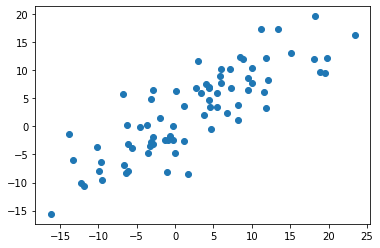

In [ ]:
plt.scatter(y_test,y_pred)

In [ ]:
df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,y
count,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,0.033075,-15.012982,-1.887450,0.249949,-0.230098,0.168252,7.152478,12668.935253,2.933298
std,104.520376,105.568086,10.916159,10.033659,10.861130,10.774610,99.856621,15098.232919,9.200321
min,-254.417500,-298.218750,-31.193750,-25.533750,-28.862500,-28.546250,-281.456250,0.480000,-19.830000
25%,-66.497500,-90.390000,-9.020000,-6.127500,-7.600000,-7.220000,-70.875000,1514.795000,-2.935000
50%,4.370000,-12.773966,-2.461732,-0.176461,-0.309916,-0.452360,15.669719,5823.870000,2.980000
75%,58.782500,48.162500,5.762500,6.810000,6.575000,6.997500,69.512500,18766.590000,8.572500
max,246.702500,255.991250,27.936250,26.216250,27.837500,28.323750,280.093750,44644.282500,30.600000


##Result Version2

In [ ]:
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
print("RMSE = ", rmse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("MAPE = ", mape, "%")
print('data len :',len(df.index))

RMSE =  4.831861560650936
MAPE =  351.9951198403162 %
data len : 188


In [ ]:
#K - FOLD
from sklearn.model_selection import KFold
kf = KFold(n_splits=4, shuffle=True)
kf.get_n_splits(x)
rmse_ = []

for train_index, test_index in kf.split(x):
  X_train = x.loc[train_index]
  X_test = x.loc[test_index]
  y_train = y.loc[train_index]
  y_test = y.loc[test_index]

  lm = LinearRegression()
  lm.fit(X_train, y_train)
  y_pred = lm.predict(X_test)
  rmse_.append(np.sqrt(((y_test - y_pred)**2).mean()))
print(rmse_)
print("RMSE for 4-fold = ", np.mean(rmse_) )

[6.427864171101827, 4.411013016540982, 5.24520531860901, 5.251554207832784]
RMSE for 4-fold =  5.33390917852115


##Version 3
1. Impute with median 
2. drop outlier
3. feature x1 x2

In [ ]:
df = pd.read_csv(B_train_path)
df_ori = pd.read_csv(B_train_path)

In [ ]:
print('all null:',df.isnull().sum().sum())
print('null at y:',df['y'].isnull().sum())
df.dropna(subset=['y'], inplace=True)
print('data len:',len(df.index))

all null: 80
null at y: 2
data len: 188


In [ ]:
#impute with median
med_value_list = []
for j in range(8):
  col_name = 'x'+str(j+1)
  med_value=df[col_name].median()
  med_value_list.append(med_value_list)
  #print(col_name,'mean value',mean_value)
  df[col_name].fillna(value=med_value,inplace=True)
  #print('fill',col_name,'sucess!')
print('all null:',df.isnull().sum().sum())
print('data len:',len(df.index))

all null: 0
data len: 188


In [ ]:
#drop outlier
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out
for j in range(8):
  col_name = 'x'+str(j+1)
  df = remove_outlier(df,col_name)
  #print('fill',col_name,'sucess!')
print('data len:',len(df.index))

data len: 142


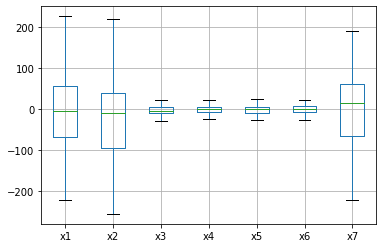

In [ ]:
stud_bplt = df.boxplot(column = [
    'x1','x2','x3','x4','x5','x6','x7',
])
stud_bplt.plot()
plt.show()

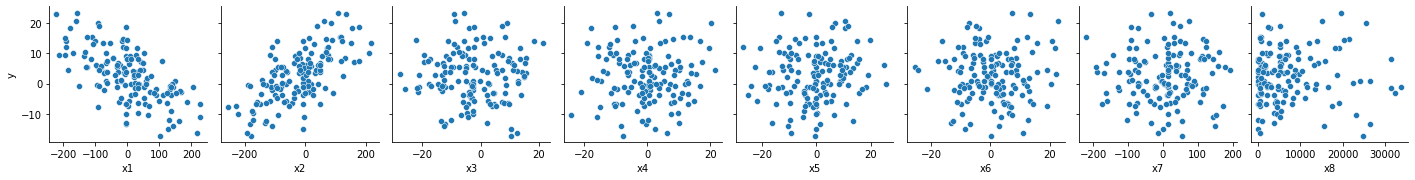

In [ ]:
sns.pairplot(df,x_vars=df.columns[0:8],y_vars=df.columns[8])

In [ ]:
df.corr().sort_values("y")[["y"]]

,y
x1,-0.640680
x3,0.001430
x7,0.008246
x8,0.011681
x6,0.017678
x4,0.027087
x5,0.091618
x2,0.658848
y,1.000000


In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
x=df[['x1','x2']]
y=df['y']

train test

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=101)

In [ ]:
scaler=preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print("len(X_train) : ", len(X_train))
print("len(X_test) : ", len(X_test))
print("len(y_train) : ", len(y_train))
print("len(y_test) : ", len(y_test))
print(len(df.index))
print(len(df_ori.index))

len(X_train) :  85
len(X_test) :  57
len(y_train) :  85
len(y_test) :  57
142
190


In [ ]:
lm = LinearRegression()
lm.fit(X_train,y_train)
print("LM MODEL")
print("")
print(y.name, "=")
for i in range(0,len(x.columns)):
  print("", lm.coef_[i],"*",x.columns[i],"   +")
print("", lm.intercept_)

LM MODEL

y =
 -4.769813740483861 * x1    +
 5.031589598417834 * x2    +
 2.0831764705882354


predict

In [ ]:
y_pred = lm.predict(X_test)
y_pred

array([ -2.509552  ,  -4.40322254,   5.64466956,  -3.87668854,
         7.183643  ,  -5.51042057,   5.78873694,  17.22340893,
         1.23331738,   6.96685041,  -1.83826304,  14.59138865,
         3.90185621,  -0.14238503,   0.9165031 ,  16.35632942,
       -10.02194178,  14.8449586 ,  15.46535021,   8.16021412,
        -8.70011273,  -2.72382786,  14.26093175,   7.45190891,
         1.71783541,  -6.67075033,  10.11256788,  12.18395031,
         3.9477845 ,   7.01109092,   1.38099856,  -8.54730241,
        -2.08250831,   6.06682755,   3.94080591,  14.52229514,
        -0.30432813,   1.35946854,  -0.63678787,   3.43186893,
         5.77477012,   0.88705222,   7.38362375,   0.78832656,
        -3.23977243,   4.33389764,  -4.89032538,  -0.07713505,
        -5.5829929 ,   4.57323196,  12.12691113,   7.53500526,
         7.66114169,  -1.30620204,   4.765182  ,  -4.16156441,
         3.84596096])

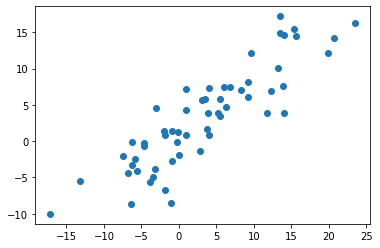

In [ ]:
plt.scatter(y_test,y_pred)

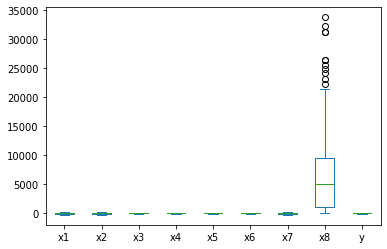

In [ ]:
df.plot.box()

##Result Version3

In [ ]:
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
print("RMSE = ", rmse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("MAPE = ", mape, "%")
print('data len :',len(df.index))

RMSE =  4.11056737631244
MAPE =  inf %
data len : 142


In [ ]:
#K - FOLD
from sklearn.model_selection import KFold
kf = KFold(n_splits=4, shuffle=True)
kf.get_n_splits(x)
rmse_ = []

for train_index, test_index in kf.split(x):
  X_train = x.loc[train_index]
  X_test = x.loc[test_index]
  y_train = y.loc[train_index]
  y_test = y.loc[test_index]

  lm = LinearRegression()
  lm.fit(X_train, y_train)
  y_pred = lm.predict(X_test)
  rmse_.append(np.sqrt(((y_test - y_pred)**2).mean()))
print(rmse_)
print("RMSE for 4-fold = ", np.mean(rmse_) )

[4.200980575613867, 4.7159898934845845, 4.290732779908762, 3.8208645177737814]
RMSE for 4-fold =  4.257141941695249


##Version 4 
1. Impute with median 
2. cap outlier
3. feature x1 x2

In [ ]:
df = pd.read_csv(B_train_path)
df_ori = pd.read_csv(B_train_path)

In [ ]:
print('all null:',df.isnull().sum().sum())
print('null at y:',df['y'].isnull().sum())
df.dropna(subset=['y'], inplace=True)
print('data len:',len(df.index))

all null: 80
null at y: 2
data len: 188


In [ ]:
#impute with median
med_value_list = []
for j in range(8):
  col_name = 'x'+str(j+1)
  med_value=df[col_name].median()
  med_value_list.append(med_value_list)
  #print(col_name,'mean value',mean_value)
  df[col_name].fillna(value=med_value,inplace=True)
  #print('fill',col_name,'sucess!')
print('all null:',df.isnull().sum().sum())
print('data len:',len(df.index))

all null: 0
data len: 188


In [ ]:
#cap outlier 
def cap_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    lst=[fence_low,fence_high]

    #df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return fence_low,fence_high
for i in range(8):
  col_name = 'x'+str(i+1)
  
  fence_low,fence_high = cap_outlier(df,col_name)
  print(fence_low,fence_high)
  df[col_name].values[df[col_name].values < fence_low] = fence_low
  df[col_name].values[df[col_name].values > fence_high] = fence_high


-254.41750000000002 246.70250000000001
-298.21875 255.99125
-31.193749999999998 27.936249999999998
-25.53375 26.216250000000002
-28.862500000000004 27.837500000000002
-28.54625 28.32375
-281.45624999999995 280.09375
-16785.6325 32015.5075


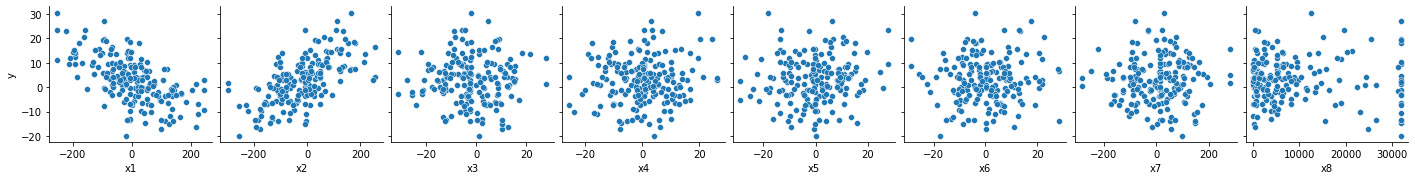

In [ ]:
sns.pairplot(df,x_vars=df.columns[0:8],y_vars=df.columns[8])

In [ ]:
df.corr().sort_values("y")[["y"]]

,y
x1,-0.611460
x8,-0.069129
x3,-0.002171
x7,0.029571
x6,0.044915
x4,0.080131
x5,0.088595
x2,0.627483
y,1.000000


In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
x=df[['x1','x2']]
y=df['y']

train test

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=101)

In [ ]:
scaler=preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print("len(X_train) : ", len(X_train))
print("len(X_test) : ", len(X_test))
print("len(y_train) : ", len(y_train))
print("len(y_test) : ", len(y_test))
print(len(df.index))
print(len(df_ori.index))

len(X_train) :  112
len(X_test) :  76
len(y_train) :  112
len(y_test) :  76
188
190


In [ ]:
lm = LinearRegression()
lm.fit(X_train,y_train)
print("LM MODEL")
print("")
print(y.name, "=")
for i in range(0,len(x.columns)):
  print("", lm.coef_[i],"*",x.columns[i],"   +")
print("", lm.intercept_)

LM MODEL

y =
 -4.475546536279764 * x1    +
 5.29873572464389 * x2    +
 3.2782142857142853


predict

In [ ]:
y_pred = lm.predict(X_test)
y_pred

array([ 1.62044669e+01,  3.42048326e+00,  4.60131955e+00,  1.36889715e+00,
        7.60575531e+00, -8.17571614e+00,  1.30117868e+01, -6.41921341e+00,
        8.13185362e+00,  9.62052611e+00,  1.20079278e+01,  1.71663267e+01,
       -2.51259268e+00, -2.42670782e+00,  3.55953710e+00, -1.72418209e+00,
       -4.73370604e+00,  7.45843114e+00,  6.33435854e+00,  1.21474457e+01,
        1.04130127e-01, -2.17910136e-01,  8.90189040e+00, -9.61678497e+00,
        5.99349969e+00,  5.94947214e+00, -1.18427812e+00,  5.80400533e+00,
       -1.00698635e+01, -2.86176452e+00,  1.02316778e+01, -3.53308256e+00,
       -4.78327091e+00,  6.77365514e+00,  6.32959443e+00,  7.64581683e+00,
       -6.65422336e+00,  1.01565872e+01,  6.77083629e+00, -4.44052264e-01,
       -7.33442398e+00, -1.07215809e+01, -2.89999585e-03,  6.87750653e+00,
        6.75617384e+00, -1.33092052e+00,  8.58441639e+00,  3.71460397e+00,
       -2.66322623e+00, -3.16190644e+00, -1.56236662e+01,  1.18891289e+01,
        1.37743035e-01, -

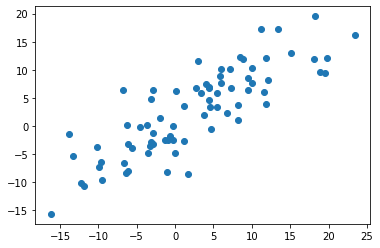

In [ ]:
plt.scatter(y_test,y_pred)

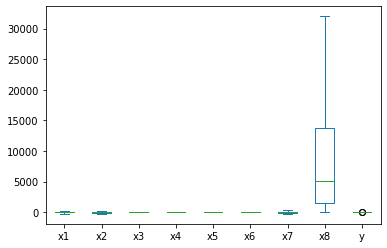

In [ ]:
df.plot.box()

##Result Version4

In [ ]:
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
print("RMSE = ", rmse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("MAPE = ", mape, "%")
print('data len :',len(df.index))

RMSE =  4.860214612481709
MAPE =  354.29153220999524 %
data len : 188


In [ ]:
#K - FOLD
from sklearn.model_selection import KFold
kf = KFold(n_splits=4, shuffle=True)
kf.get_n_splits(x)
rmse_ = []

for train_index, test_index in kf.split(x):
  X_train = x.loc[train_index]
  X_test = x.loc[test_index]
  y_train = y.loc[train_index]
  y_test = y.loc[test_index]

  lm = LinearRegression()
  lm.fit(X_train, y_train)
  y_pred = lm.predict(X_test)
  rmse_.append(np.sqrt(((y_test - y_pred)**2).mean()))
print(rmse_)
print("RMSE for 4-fold = ", np.mean(rmse_) )

[5.911332053955977, 4.47501180863047, 4.834700665843602, 6.540579840067769]
RMSE for 4-fold =  5.440406092124455


##Version 5
1. Impute with median 
2. drop outlier
3. Impute with mean
4. feature x1 x2

In [ ]:
df = pd.read_csv(B_train_path)
df_ori = pd.read_csv(B_train_path)
df_test = pd.read_csv(B_test_path)

In [ ]:
print('all null:',df.isnull().sum().sum())
print('null at y:',df['y'].isnull().sum())
df.dropna(subset=['y'], inplace=True)
print('data len:',len(df.index))

all null: 80
null at y: 2
data len: 188


In [ ]:
#impute with median
med_value_list = []
med_value_list_test = []

for j in range(8):
  col_name = 'x'+str(j+1)
  med_value=df[col_name].median()
  med_value_list.append(med_value)
  #print(col_name,'mean value',mean_value)
  df[col_name].fillna(value=med_value,inplace=True)
  #print('fill',col_name,'sucess!')
  #TEST
  df_test
  med_value_test=df_test[col_name].median()
  med_value_list_test.append(med_value_test)
  #print(col_name,'mean value',mean_value)
  df_test[col_name].fillna(value=med_value_test,inplace=True)

print('all null:',df.isnull().sum().sum())
print('data len:',len(df.index))

all null: 0
data len: 188


In [ ]:
#drop outlier
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out
for j in range(8):
  col_name = 'x'+str(j+1)
  df = remove_outlier(df,col_name)
 
  #print('fill',col_name,'sucess!')
print('data len:',len(df.index))

data len: 142


In [ ]:
df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,y
count,142.000000,142.000000,142.00000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,0.565211,-20.743803,-2.29500,-0.069789,-0.666690,0.588063,5.008873,7249.543662,2.608310
std,99.288531,95.973620,10.40986,9.326114,10.458031,9.479260,86.665948,7935.197705,8.425943
min,-221.370000,-255.010000,-27.79000,-24.020000,-27.040000,-25.530000,-220.110000,0.480000,-17.130000
25%,-66.842500,-94.002500,-9.92250,-6.255000,-8.275000,-6.160000,-65.980000,1084.332500,-3.045000
50%,-3.650000,-8.070000,-3.02500,0.485000,-0.050000,0.255000,14.715000,5019.410000,2.800000
75%,56.962500,40.762500,5.64750,6.685000,6.215000,6.967500,62.215000,9525.395000,8.210000
max,226.760000,219.230000,21.43000,21.440000,25.740000,22.710000,191.590000,33822.890000,23.440000


In [ ]:
#replace with mean
for j in range(8):
  col_name = 'x'+str(j+1)
  mean_value=df[col_name].mean()
  df.loc[df[col_name]==med_value_list[i]] = mean_value
  
  
  mean_value_test=df_test[col_name].mean()
  df_test.loc[df_test[col_name]==med_value_list_test[i]] = mean_value_test
  
  #print(col_name,'mean value',mean_value)
  #print('fill mean ',col_name,'sucess! :',meanvalue)

In [ ]:
df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,y
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,-3.461103,-21.368568,-3.416314,-1.214835,-1.716385,-0.568497,4.449531,6897.102982,1.607770
std,96.023261,95.930018,10.535468,10.146896,11.108710,10.345243,86.318896,7932.928005,9.655732
min,-221.370000,-255.010000,-25.960000,-24.020000,-27.040000,-25.530000,-220.110000,-20.743803,-20.743803
25%,-66.842500,-94.002500,-11.822500,-8.077500,-9.637500,-7.280000,-55.722500,829.797500,-3.630000
50%,-3.650000,-20.070000,-3.470000,0.015000,-0.215000,0.255000,14.715000,4654.660000,2.275000
75%,52.895000,40.762500,4.565000,6.212500,5.542500,6.937500,62.215000,9267.945000,8.202500
max,226.330000,219.230000,21.430000,21.440000,25.740000,22.710000,191.590000,33822.890000,23.440000


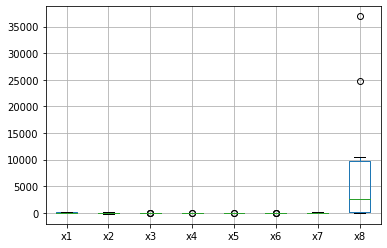

In [ ]:
df_test.boxplot()

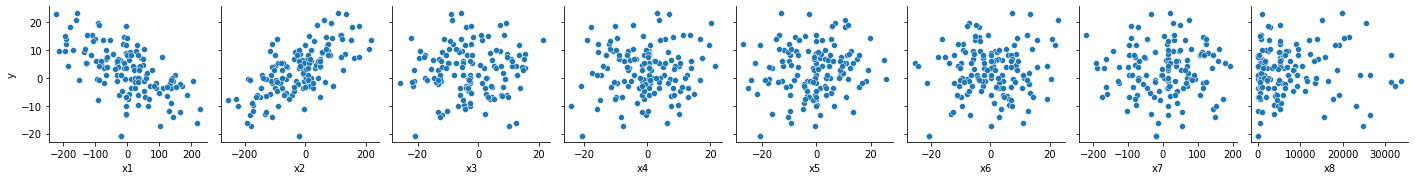

In [ ]:
sns.pairplot(df,x_vars=df.columns[0:8],y_vars=df.columns[8])

In [ ]:
df.corr().sort_values("y")[["y"]]

,y
x1,-0.518783
x7,0.037066
x8,0.107277
x3,0.199909
x6,0.243391
x4,0.255449
x5,0.263032
x2,0.576592
y,1.000000


In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
x=df[['x1','x2']]
y=df['y']
B_test=df_test[['x1','x2']]

train test

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=101)

In [ ]:
scaler=preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
print("len(X_train) : ", len(X_train))
print("len(X_test) : ", len(X_test))
print("len(y_train) : ", len(y_train))
print("len(y_test) : ", len(y_test))
print(len(df.index))
print(len(df_ori.index))

len(X_train) :  85
len(X_test) :  57
len(y_train) :  85
len(y_test) :  57
142
190


In [ ]:
lm = LinearRegression()
lm.fit(X_train,y_train)
print("LM MODEL")
print("")
print(y.name, "=")
for i in range(0,len(x.columns)):
  print("", lm.coef_[i],"*",x.columns[i],"   +")
print("", lm.intercept_)

LM MODEL

y =
 -4.021363788582531 * x1    +
 5.093186311032422 * x2    +
 0.8199668599834298


predict

In [ ]:
B_test

,x1,x2
0,50.690,-120.500
1,102.080,74.690
2,54.080,49.860
3,49.390,-101.880
4,140.490,59.990
5,-44.173,-44.173
6,-44.173,-44.173
7,-83.820,-104.840
8,147.150,9.140
9,8.680,-207.090


In [ ]:
#B Predict
y_pred = lm.predict(B_test)
y_pred

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([ -816.75191406,   -29.27076311,    37.29088264,  -716.68901203,
        -258.601185  ,   -46.52564942,   -46.52564942,  -196.07897323,
        -544.37199175, -1088.83342398])

In [ ]:
y_pred = lm.predict(X_test)
y_pred

array([-4.08854152e+00, -6.06841062e+00,  3.89621032e+00, -4.76295853e+00,
        5.28537143e+00, -7.18976913e+00,  4.07723595e+00,  1.55358788e+01,
        7.33635032e-03,  4.30795756e+00, -2.59986161e+00,  1.25786096e+01,
        1.93824200e+00, -1.66483825e+00, -1.03692529e+00,  1.40312289e+01,
       -1.11260042e+01,  1.29982920e+01,  1.33188287e+01,  5.86238005e+00,
       -9.64789107e+00, -4.03463090e+00,  1.18901793e+01,  5.79408423e+00,
        3.29158439e-01, -7.54631543e+00,  8.01335444e+00,  1.01989276e+01,
        2.34507007e+00,  5.58693317e+00, -6.25697977e-01, -9.38561090e+00,
       -3.28927888e+00,  4.61083683e+00,  1.88471797e+00,  1.24573744e+01,
       -2.00286497e+00, -1.12605264e+00, -1.91065920e+00,  1.39496384e+00,
        4.19319326e+00, -3.34021285e-01,  5.71944456e+00, -2.46384542e-01,
       -5.01741266e+00,  2.68492355e+00, -6.40122294e+00, -1.46154353e+00,
       -6.70316518e+00,  3.54157253e+00,  9.41517350e+00,  5.85890863e+00,
        5.01769384e+00, -

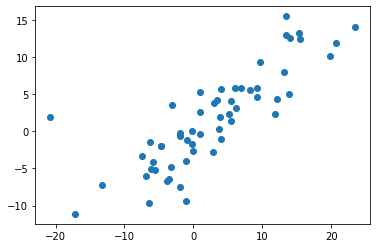

In [ ]:
plt.scatter(y_test,y_pred)

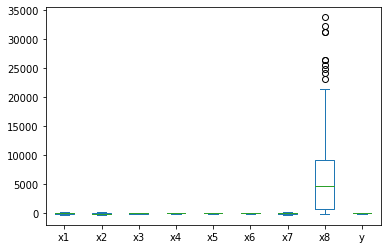

In [ ]:
df.plot.box()

##Result Version5

In [ ]:
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
print("RMSE = ", rmse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("MAPE = ", mape, "%")
print('data len :',len(df.index))

RMSE =  5.230127335928739
MAPE =  inf %
data len : 142


In [ ]:
#K - FOLD
from sklearn.model_selection import KFold
kf = KFold(n_splits=4, shuffle=True)
kf.get_n_splits(x)
rmse_ = []

for train_index, test_index in kf.split(x):
  X_train = x.loc[train_index]
  X_test = x.loc[test_index]
  y_train = y.loc[train_index]
  y_test = y.loc[test_index]

  lm = LinearRegression()
  lm.fit(X_train, y_train)
  y_pred = lm.predict(X_test)
  rmse_.append(np.sqrt(((y_test - y_pred)**2).mean()))
print(rmse_)
print("RMSE for 4-fold = ", np.mean(rmse_) )

[6.538194418057841, 5.9550965169806105, 8.065433810503317, 5.5019056070106185]
RMSE for 4-fold =  6.515157588138097


##Version 6
1. Impute with median 
2. cap outlier
3. Impute with mean
4. feature x1 x2

In [ ]:
df = pd.read_csv(B_train_path)
df_ori = pd.read_csv(B_train_path)
df_test = pd.read_csv(B_test_path)

In [ ]:
print('all null:',df.isnull().sum().sum())
print('null at y:',df['y'].isnull().sum())
df.dropna(subset=['y'], inplace=True)

print('data len:',len(df.index))

all null: 80
null at y: 2
data len: 188


In [ ]:
#impute with median
med_value_list = []
med_value_list_test = []
for j in range(8):
  col_name = 'x'+str(j+1)
  med_value=df[col_name].median()
  med_value_list.append(med_value)
  #print(col_name,'mean value',mean_value)
  df[col_name].fillna(value=med_value,inplace=True)
  #TEST
  med_value_test=df[col_name].median()
  med_value_list_test.append(med_value_test)
  #print(col_name,'mean value',mean_value)
  df_test[col_name].fillna(value=med_value_test,inplace=True)
print('all null:',df.isnull().sum().sum())
print('data len:',len(df.index))
print("TEST")
print('all null:',df_test.isnull().sum().sum())
print('data len:',len(df_test.index))


all null: 0
data len: 188
TEST
all null: 0
data len: 10


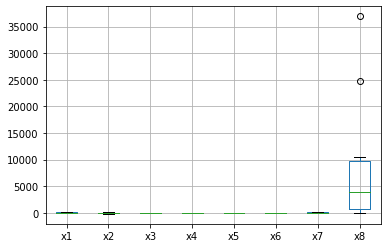

In [ ]:
df_test.boxplot()

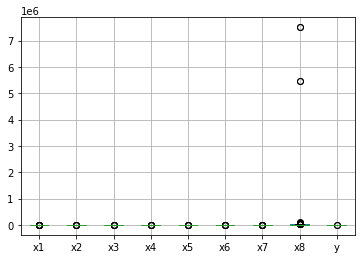

In [ ]:
df.boxplot()

In [ ]:
#cap outlier 
def cap_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    lst=[fence_low,fence_high]

    #df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return fence_low,fence_high
for i in range(8):
  col_name = 'x'+str(i+1)
  
  fence_low,fence_high = cap_outlier(df,col_name)
  print(fence_low,fence_high)
  df[col_name].values[df[col_name].values < fence_low] = fence_low
  df[col_name].values[df[col_name].values > fence_high] = fence_high
  #TEST
  fence_low,fence_high = cap_outlier(df_test,col_name)
  print(fence_low,fence_high)
  df_test[col_name].values[df_test[col_name].values < fence_low] = fence_low
  df_test[col_name].values[df_test[col_name].values > fence_high] = fence_high


-254.41750000000002 246.70250000000001
-110.92625 235.16375
-298.21875 255.99125
-319.77 255.35000000000002
-31.193749999999998 27.936249999999998
-20.2575 22.9825
-25.53375 26.216250000000002
-26.286250000000003 18.34375
-28.862500000000004 27.837500000000002
-18.96375 18.28625
-28.54625 28.32375
-32.551249999999996 34.058749999999996
-281.45624999999995 280.09375
-178.43 238.01
-16785.6325 32015.5075
-13069.647500000003 23451.952500000003


In [ ]:
df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,y
count,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,-0.832527,-14.787793,-1.894069,0.286995,-0.216702,0.205878,7.101695,9502.086888,2.933298
std,104.479685,105.577690,10.916549,10.033300,10.861171,10.773606,99.852497,10605.945443,9.200321
min,-254.417500,-298.218750,-31.193750,-25.533750,-28.862500,-28.546250,-281.456250,0.480000,-19.830000
25%,-66.497500,-90.390000,-9.020000,-6.127500,-7.600000,-7.220000,-70.875000,1514.795000,-2.935000
50%,-3.650000,-8.070000,-2.600000,0.520000,-0.050000,0.255000,14.715000,5119.200000,2.980000
75%,58.782500,48.162500,5.762500,6.810000,6.575000,6.997500,69.512500,13715.080000,8.572500
max,246.702500,255.991250,27.936250,26.216250,27.837500,28.323750,280.093750,32015.507500,30.600000


In [ ]:
for j in range(8):
  col_name = 'x'+str(j+1)
  df.loc[df[col_name]==med_value_list[i]] = mean_value
  df_test.loc[df[col_name]==med_value_list[i]] = mean_value
  #print(col_name,'mean value',mean_value)
  #print('fill mean ',col_name,'sucess! :',meanvalue)

In [ ]:
df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,y
count,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,367.160930,350.786834,365.205238,367.344441,366.702978,367.154015,373.467552,9596.656196,369.424573
std,1555.186668,1559.246913,1552.379173,1551.864383,1552.023616,1551.915918,1553.255122,10574.153184,1551.365531
min,-254.417500,-298.218750,-31.193750,-25.533750,-28.862500,-28.546250,-281.456250,0.480000,-19.830000
25%,-62.987500,-90.022500,-8.017500,-5.432500,-6.822500,-6.927500,-69.292500,1514.795000,-2.872500
50%,-0.985000,-8.070000,-2.345000,0.700000,0.025000,0.775000,14.772500,5823.870000,3.050000
75%,77.505000,61.407500,8.292500,8.500000,9.182500,8.477500,82.055000,13715.080000,9.522500
max,6897.102982,6897.102982,6897.102982,6897.102982,6897.102982,6897.102982,6897.102982,32015.507500,6897.102982


In [ ]:
sns.pairplot(df,x_vars=df.columns[0:8],y_vars=df.columns[8])

Error in callback <function flush_figures at 0x7f5a0254e200> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
df.corr().sort_values("y")[["y"]]

,y
x8,-0.061021
x1,0.997628
x2,0.997998
x7,0.998141
x3,0.999960
x6,0.999962
x5,0.999963
x4,0.999967
y,1.000000


In [ ]:
df_test

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,50.69,-120.50,-5.93,7.43,-16.28,-9.260,96.680,10510.3500,B_01
1,102.08,74.69,-4.95,-2.20,-4.95,0.255,27.300,23451.9525,B_02
2,-3.65,49.86,1.00,-5.35,0.72,-9.810,14.715,23451.9525,B_03
3,49.39,-101.88,8.69,-7.54,-11.28,4.610,-15.110,5119.2000,B_04
4,140.49,59.99,0.05,6.55,-0.05,-0.420,109.930,2603.0400,B_05
5,54.08,-8.07,11.00,-16.44,5.31,17.830,-90.670,5.2000,B_06
6,106.48,-50.55,16.47,0.52,1.34,-11.530,138.030,1753.9300,B_07
7,-83.82,-104.84,-2.60,-13.70,10.19,-2.510,-34.020,7494.3600,B_08
8,147.15,9.14,-3.06,1.97,8.14,26.990,37.340,249.9600,B_09
9,8.68,-207.09,-4.37,-10.22,-5.01,10.570,-24.650,20.4300,B_10


In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
x=df[['x1','x2']]
y=df['y']
B_test=df_test[['x1','x2']]

train test

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=101)

In [ ]:
scaler=preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print("len(X_train) : ", len(X_train))
print("len(X_test) : ", len(X_test))
print("len(y_train) : ", len(y_train))
print("len(y_test) : ", len(y_test))
print(len(df.index))
print(len(df_ori.index))

len(X_train) :  112
len(X_test) :  76
len(y_train) :  112
len(y_test) :  76
188
190


In [ ]:
lm = LinearRegression()
lm.fit(X_train,y_train)
print("LM MODEL")
print("")
print(y.name, "=")
for i in range(0,len(x.columns)):
  print("", lm.coef_[i],"*",x.columns[i],"   +")
print("", lm.intercept_)

LM MODEL

y =
 804.3830922748388 * x1    +
 865.0709663975238 * x2    +
 434.057061346955


predict

In [ ]:
x_test

,x1,x2
0,50.69,-120.50
1,102.08,74.69
2,-3.65,49.86
3,49.39,-101.88
4,140.49,59.99
5,54.08,-8.07
6,106.48,-50.55
7,-83.82,-104.84
8,147.15,9.14
9,8.68,-207.09


In [ ]:
y_pred_test = lm.predict(x_test)
y_pred_test

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([ -63032.81544214,  147157.63360099,   40630.49715912,
        -47970.89206778,  165337.44496923,   36953.97199274,
         42355.43137538, -157683.37385025,  126705.77772246,
       -171731.44412897])

In [ ]:
y_pred = lm.predict(X_test)
y_pred

array([-8.47496528e+00,  5.39060488e+01,  5.63940304e+01, -8.05202221e+01,
        2.17457351e+01,  2.24513036e+01, -7.55092588e+01, -6.13463871e+01,
        6.88822773e+03,  6.88822773e+03,  7.03872423e+01, -8.90112486e+01,
       -4.43512192e+00, -2.11173178e+01,  7.85739339e+01,  8.11145715e+01,
       -5.36182002e+01,  2.23871643e+01, -2.31383326e+00,  1.10320898e+01,
        5.56886833e+00, -4.57475603e+01, -2.28521926e+01,  1.04761271e+02,
        6.36053539e+01, -3.49751775e+01, -4.23274725e+01, -8.75935086e+01,
        2.23287597e+01,  8.44312056e+01, -7.99396389e+01,  5.30060459e+01,
       -4.45261608e+01, -3.92637060e+01, -1.42234937e+02, -1.10509877e+01,
        1.16324840e+02, -1.40161063e+01,  1.12435531e+02, -7.69723607e+01,
       -1.04827197e+02, -1.44947237e+01, -1.67000850e+01, -1.27694127e+02,
        1.54128387e+02,  6.47107883e+01,  1.03983402e+01, -9.57255136e+01,
       -7.26804292e+01,  9.83781622e+01,  1.68619469e+01,  1.16303203e+02,
        7.88082721e+01, -

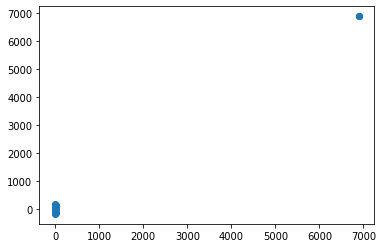

In [ ]:
plt.scatter(y_test,y_pred)

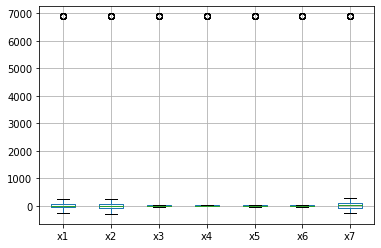

In [ ]:
stud_bplt = df.boxplot(column = [
    'x1','x2','x3','x4','x5','x6','x7',
])
stud_bplt.plot()
plt.show()


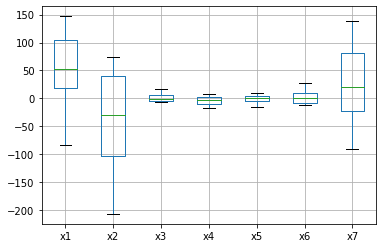

In [ ]:
stud_bplt = df_test.boxplot(column = [
    'x1','x2','x3','x4','x5','x6','x7',
])
stud_bplt.plot()
plt.show()

##Result Version6

In [ ]:
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
print("RMSE = ", rmse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("MAPE = ", mape, "%")
print('data len :',len(df.index))

RMSE =  71.98625200790599
MAPE =  3921.970596232561 %
data len : 188


In [ ]:
#K - FOLD
from sklearn.model_selection import KFold
kf = KFold(n_splits=4, shuffle=True)
kf.get_n_splits(x)
rmse_ = []

for train_index, test_index in kf.split(x):
  X_train = x.loc[train_index]
  X_test = x.loc[test_index]
  y_train = y.loc[train_index]
  y_test = y.loc[test_index]

  lm = LinearRegression()
  lm.fit(X_train, y_train)
  y_pred = lm.predict(X_test)
  rmse_.append(np.sqrt(((y_test - y_pred)**2).mean()))
print(rmse_)
print("RMSE for 4-fold = ", np.mean(rmse_) )

[65.6083882414069, 70.79223602434416, 72.37614974570229, 59.037567403662266]
RMSE for 4-fold =  66.9535853537789


##Version 7
1. Impute with median 
2. drop outlier
4. feature x1 x2

In [ ]:
df = pd.read_csv(B_train_path)
df_ori = pd.read_csv(B_train_path)
df_test = pd.read_csv(B_test_path)

In [ ]:
df.drop('x3', axis=1, inplace=True)
df.drop('x4', axis=1, inplace=True)
df.drop('x5', axis=1, inplace=True)
df.drop('x6', axis=1, inplace=True)
df.drop('x7', axis=1, inplace=True)
df.drop('x8', axis=1, inplace=True)

In [ ]:
print('all null:',df.isnull().sum().sum())
print('null at y:',df['y'].isnull().sum())
df.dropna(subset=['y'], inplace=True)
print('data len:',len(df.index))

all null: 22
null at y: 2
data len: 188


In [ ]:
print('all null:',df.isnull().sum().sum())
df.dropna(subset=['x2'], inplace=True)
df.dropna(subset=['x1'], inplace=True)
print('data len:',len(df.index))

all null: 19
data len: 169


In [ ]:
print('null at y:',df['x1'].isnull().sum())

null at y: 0


In [ ]:
print('null at y:',df['x2'].isnull().sum())

null at y: 0


In [ ]:
#impute with median
med_value_list = []
med_value_list_test = []

for j in range(2):
  col_name = 'x'+str(j+1)
  med_value=df[col_name].median()
  med_value_list.append(med_value)
  #print(col_name,'mean value',mean_value)
  df[col_name].fillna(value=med_value,inplace=True)
  #print('fill',col_name,'sucess!')
  #TEST
  df_test
  med_value_test=df_test[col_name].median()
  med_value_list_test.append(med_value_test)
  #print(col_name,'mean value',mean_value)
  df_test[col_name].fillna(value=med_value_test,inplace=True)

print('all null:',df.isnull().sum().sum())
print('data len:',len(df.index))

all null: 0
data len: 169


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


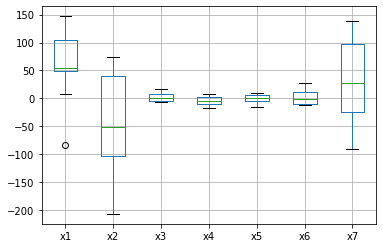

In [ ]:
stud_bplt = df_test.boxplot(column = [
    'x1','x2','x3','x4','x5','x6','x7',
])
stud_bplt.plot()
plt.show()

In [ ]:
#drop outlier
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out
for j in range(2):
  col_name = 'x'+str(j+1)
  df = remove_outlier(df,col_name)
 
  #print('fill',col_name,'sucess!')
print('data len:',len(df.index))

data len: 163


KeyError: ignored

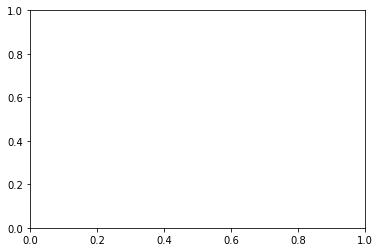

In [ ]:
# stud_bplt = df.boxplot(column = [
#     'x1','x2','x3','x4','x5','x6','x7',
# ])
# stud_bplt.plot()
# plt.show()

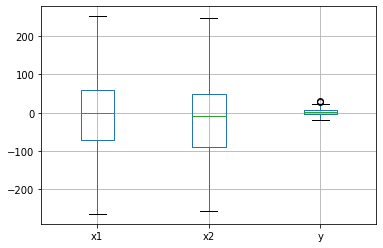

In [ ]:
df.boxplot()

In [ ]:
# #replace with mean
# for j in range(8):
#   col_name = 'x'+str(j+1)
#   mean_value=df[col_name].mean()
#   df.loc[df[col_name]==med_value_list[i]] = mean_value
  
  
#   mean_value_test=df_test[col_name].mean()
#   df_test.loc[df_test[col_name]==med_value_list_test[i]] = mean_value_test
  
#   #print(col_name,'mean value',mean_value)
#   #print('fill mean ',col_name,'sucess! :',meanvalue)

In [ ]:
df.describe()

,x1,x2,y
count,163.000000,163.000000,163.000000
mean,-2.337239,-13.105828,3.061043
std,102.320095,99.750695,9.063004
min,-263.760000,-256.170000,-19.830000
25%,-71.000000,-89.675000,-2.875000
50%,-1.710000,-8.070000,3.020000
75%,60.210000,49.285000,8.475000
max,251.830000,246.400000,30.600000


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


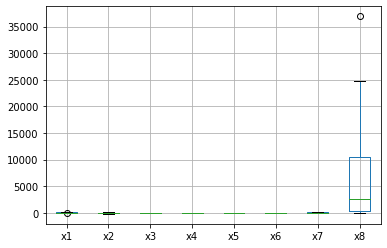

In [ ]:
df_test.boxplot()

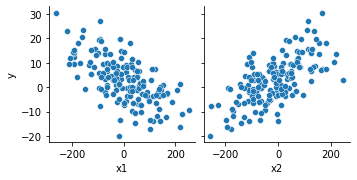

In [ ]:
sns.pairplot(df,x_vars=df.columns[0:2],y_vars=df.columns[2])

In [ ]:
df.corr().sort_values("y")[["y"]]

,y
x1,-0.638868
x2,0.653908
y,1.000000


In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
x=df[['x1','x2']]
y=df['y']
B_test=df_test[['x1','x2']]

train test

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=101)

In [ ]:
scaler=preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
print("len(X_train) : ", len(X_train))
print("len(X_test) : ", len(X_test))
print("len(y_train) : ", len(y_train))
print("len(y_test) : ", len(y_test))
print(len(df.index))
print(len(df_ori.index))

len(X_train) :  97
len(X_test) :  66
len(y_train) :  97
len(y_test) :  66
163
190


In [ ]:
lm = LinearRegression()
lm.fit(X_train,y_train)
print("LM MODEL")
print("")
print(y.name, "=")
for i in range(0,len(x.columns)):
  print("", lm.coef_[i],"*",x.columns[i],"   +")
print("", lm.intercept_)

LM MODEL

y =
 -4.699213367503133 * x1    +
 5.453240347352223 * x2    +
 2.6102061855670105


predict

In [ ]:
# X_train=df[['x1','x2']]
# y_train=df['y']
# B_test=df_test[['x1','x2']]
# lm = LinearRegression()
# lm.fit(X_train,y_train)
# print("LM MODEL")
# print("")
# print(y.name, "=")
# for i in range(0,len(x.columns)):
#   print("", lm.coef_[i],"*",x.columns[i],"   +")
# print("", lm.intercept_)

# print("len(X_train) : ", len(X_train))
# #print("len(X_test) : ", len(X_test))
# print("len(y_train) : ", len(y_train))
# #print("len(y_test) : ", len(y_test))
# print(len(df.index))
# print(len(df_ori.index))

In [ ]:
#scaler=preprocessing.StandardScaler().fit(X_train)
#B_test = scaler.transform(B_test)

In [ ]:

B_test

,x1,x2
0,50.69,-120.50
1,102.08,74.69
2,54.08,49.86
3,49.39,-101.88
4,140.49,59.99
5,54.08,-50.55
6,106.48,-50.55
7,-83.82,-104.84
8,147.15,9.14
9,8.68,-207.09


In [ ]:
#B Predict
y_pred_test = lm.predict(B_test)
y_pred_test

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([ -892.70838127,   -69.78297283,    20.37531099,  -785.06006862,
        -330.44239138,  -527.18455229,  -773.42333274,  -175.21944737,
        -639.03642407, -1167.49050938])

In [ ]:
y_pred_test

array([ -892.70838127,   -69.78297283,    20.37531099,  -785.06006862,
        -330.44239138,  -527.18455229,  -773.42333274,  -175.21944737,
        -639.03642407, -1167.49050938])

In [ ]:
y_pred = lm.predict(X_test)
y_pred

array([  7.06341213,  -6.0377702 ,  -6.3950276 ,   8.30125554,
         0.556805  ,   9.79903211,  12.37874975,  -7.41495514,
        -1.15820498,  13.39122989,   4.96247707,  -0.17581233,
        -9.15238531,  10.52055382,  -6.3673182 ,  -1.70493562,
        14.1866942 ,   0.35739118,   6.1801884 ,  17.22807258,
       -12.05715923,   8.49057655,  -2.37596442,  -0.40291083,
         4.77606286,   7.07983982,   7.81856847,   7.44360399,
         7.74121498, -12.62578032,  -9.47622632,  16.33718891,
         7.90092366,   6.52261542,  12.41773667,   3.26240781,
        -3.20900072,   4.92986719,  15.34559106,   1.23382729,
        17.45700732,  -3.17151032,  -5.45181926, -11.00757652,
         4.02172155,   5.80644265,   5.85672613,   2.20624766,
         6.9486911 ,   6.36177678,  25.55131673,  -0.92943724,
        -3.89666649,   3.50230398,  14.92203506,  -5.57606044,
        12.72580544,  21.72527664,  -3.74879998,  -1.64990157,
        -3.010285  ,   6.49967045,   3.37464721,   9.94

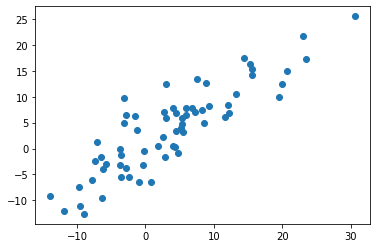

In [ ]:
plt.scatter(y_test,y_pred)

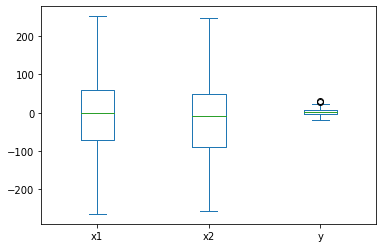

In [ ]:
df.plot.box()

##Result Version5

In [ ]:
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
print("RMSE = ", rmse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("MAPE = ", mape, "%")
print('data len :',len(df.index))

RMSE =  4.5240181964387585
MAPE =  107.9654711926653 %
data len : 163


In [ ]:
#K - FOLD
from sklearn.model_selection import KFold
kf = KFold(n_splits=4, shuffle=True)
kf.get_n_splits(x)
rmse_ = []

for train_index, test_index in kf.split(x):
  X_train = x.loc[train_index]
  X_test = x.loc[test_index]
  y_train = y.loc[train_index]
  y_test = y.loc[test_index]

  lm = LinearRegression()
  lm.fit(X_train, y_train)
  y_pred = lm.predict(X_test)
  rmse_.append(np.sqrt(((y_test - y_pred)**2).mean()))
print(rmse_)
print("RMSE for 4-fold = ", np.mean(rmse_) )

[4.304492468836812, 4.998204224983199, 4.646728308939976, 4.684683417634488]
RMSE for 4-fold =  4.658527105098619
